# Machine Learning for Bitcoin trading
## Part 1: Sourcing and treating the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models.
This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to
 visualize these features. At the end of the notebook, we prepare clean data sets,
 which will be stored in the `data/` folder.

## Importing dependencies and utility functions

As described in our project proposal, we will first use historical data from financial data as our data inputs.
For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance,
returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data,
I'll first get the data and clear the name to get an appropiate object.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import yfinance as yf

# import cufflinks as cf
from matplotlib import pyplot as plt

from data_utils.transformations import lower_clean_name, change_name, min_max_scaler, back_min_max, \
    standardizer, back_standardizer, get_log_cumulative

from data_utils.settings import settings, ticker_list

## Data Sourcing

In [8]:
signs = ['=','^','-','.']
labels = [lower_clean_name(word,signs) for word in ticker_list]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])

ticker_concat = " ".join(ticker_list)
ohlcv = yf.download(ticker_concat, start="2008-01-01", threads=False)
tickers = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

gspc = spy
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusd = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


In [9]:
ohlcv.tail()

Adj Close                                                  \
              000001.SS       BTC-USD       CL=F  EURUSD=X         GC=F   
Date                                                                      
2022-01-20  3555.060059  40680.417969  86.900002  1.134340  1842.500000   
2022-01-21  3522.570068  36457.316406  85.139999  1.131375  1831.800049   
2022-01-22          NaN  35030.250000        NaN       NaN          NaN   
2022-01-23          NaN  36276.804688        NaN       NaN          NaN   
2022-01-24  3524.104980  35846.132812  83.209999  1.132759  1841.400024   

                                                                             \
                 SI=F        ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                                          
2022-01-20  24.711000  7585.000000  4482.729980  24952.349609  14154.019531   
2022-01-21  24.313999  7494.100098  4397.939941  24965.550781  13768.919922   
2022-01-22        NaN          NaN          NaN           NaN           NaN   
2022-01-23        NaN          NaN          NaN           NaN           NaN   
2022-01-24  23.885000  7297.149902  4299.810059  24656.460938  13463.205078   

                                       Close                           \
                   ^N225   ^TNX    000001.SS       BTC-USD       CL=F   
Date                                                                    
2022-01-20  27772.929688  1.833  3555.060059  40680.417969  86.900002   
2022-01-21  27522.259766  1.747  3522.570068  36457.316406  85.139999   
2022-01-22           NaN    NaN          NaN  35030.250000        NaN   
2022-01-23           NaN    NaN          NaN  36276.804688        NaN   
2022-01-24  27588.369141  1.730  3524.104980  35846.132812  83.209999   

                                                                        \
            EURUSD=X         GC=F       SI=F        ^FTSE        ^GSPC   
Date                                                                     
2022-01-20  1.134340  1842.500000  24.711000  7585.000000  4482.729980   
2022-01-21  1.131375  1831.800049  24.313999  7494.100098  4397.939941   
2022-01-22       NaN          NaN        NaN          NaN          NaN   
2022-01-23       NaN          NaN        NaN          NaN          NaN   
2022-01-24  1.132759  1841.400024  23.885000  7297.149902  4299.810059   

                                                                    High  \
                    ^HSI         ^IXIC         ^N225   ^TNX    000001.SS   
Date                                                                       
2022-01-20  24952.349609  14154.019531  27772.929688  1.833  3576.260010   
2022-01-21  24965.550781  13768.919922  27522.259766  1.747  3547.000000   
2022-01-22           NaN           NaN           NaN    NaN          NaN   
2022-01-23           NaN           NaN           NaN    NaN          NaN   
2022-01-24  24656.460938  13463.205078  27588.369141  1.730  3531.608154   

                                                                       \
                 BTC-USD       CL=F  EURUSD=X         GC=F       SI=F   
Date                                                                    
2022-01-20  43413.023438  87.820000  1.136893  1843.000000  24.711000   
2022-01-21  41060.527344  85.559998  1.136105  1842.400024  24.313999   
2022-01-22  36688.812500        NaN       NaN          NaN        NaN   
2022-01-23  36433.312500        NaN       NaN          NaN        NaN   
2022-01-24  36319.960938  86.089996  1.135074  1844.900024  24.360001   

                                                                  \
                  ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                               
2022-01-20  7619.000000  4602.109863  24952.349609  14642.030273   
2022-01-21  7585.000000  4494.520020  24982.029297  14171.719727   
2022-01-22          NaN          NaN           NaN           NaN   


In [10]:
tickers.head()

^GSPC                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2007-12-31  1475.250000  1475.829956  1465.130005  1468.359985  1468.359985   
2008-01-01          NaN          NaN          NaN          NaN          NaN   
2008-01-02  1467.969971  1471.770020  1442.069946  1447.160034  1447.160034   
2008-01-03  1447.550049  1456.800049  1443.729980  1447.160034  1447.160034   
2008-01-04  1444.010010  1444.010010  1411.189941  1411.630005  1411.630005   

                                ^IXIC                                         \
                  Volume         Open         High          Low        Close   
Date                                                                           
2007-12-31  2.440880e+09  2663.780029  2668.610107  2646.090088  2652.280029   
2008-01-01           NaN          NaN          NaN          NaN          NaN   
2008-01-02  3.452650e+09  2653.909912  2661.500000  2597.810059  2609.629883   
2008-01-03  3.429500e+09  2611.959961  2624.270020  2592.179932  2602.679932   
2008-01-04  4.166000e+09  2571.080078  2571.080078  2502.679932  2504.649902   

                                      BTC-USD                                  \
              Adj Close        Volume    Open High Low Close Adj Close Volume   
Date                                                                            
2007-12-31  2652.280029  1.454550e+09     NaN  NaN NaN   NaN       NaN    NaN   
2008-01-01          NaN           NaN     NaN  NaN NaN   NaN       NaN    NaN   
2008-01-02  2609.629883  2.076690e+09     NaN  NaN NaN   NaN       NaN    NaN   
2008-01-03  2602.679932  1.970200e+09     NaN  NaN NaN   NaN       NaN    NaN   
2008-01-04  2504.649902  2.516310e+09     NaN  NaN NaN   NaN       NaN    NaN   

                  ^FTSE                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2007-12-31  6476.899902  6480.200195  6432.799805  6456.899902  6456.899902   
2008-01-01          NaN          NaN          NaN          NaN          NaN   
2008-01-02  6456.899902  6512.299805  6402.600098  6416.700195  6416.700195   
2008-01-03  6416.700195  6487.799805  6394.600098  6479.399902  6479.399902   
2008-01-04  6479.399902  6534.700195  6333.200195  6348.500000  6348.500000   

                                GC=F                                      \
                  Volume        Open        High         Low       Close   
Date                                                                       
2007-12-31  1.939165e+08  843.200012  843.200012  843.200012  834.900024   
2008-01-01           NaN         NaN         NaN         NaN         NaN   
2008-01-02  6.740733e+08  848.700012  857.799988  846.400024  857.000000   
2008-01-03  9.324117e+08  863.000000  865.500000  856.299988  866.400024   
2008-01-04  1.182498e+09  861.400024  865.500000  860.200012  863.099976   

                                      ^N225                              \
             Adj Close Volume          Open          High           Low   
Date                                                                      
2007-12-31  834.900024    4.0           NaN           NaN           NaN   
2008-01-01         NaN    NaN           NaN           NaN           NaN   
2008-01-02  857.000000  130.0           NaN           NaN           NaN   
2008-01-03  866.400024  181.0           NaN           NaN           NaN   
2008-01-04  863.099976   28.0  15155.730469  15156.660156  14542.580078   

                                                      SI=F                  \
                   Close     Adj Close      Volume    Open    High     Low   
Date                                                                         
2007-12-31        

In [11]:
# Renaming columns to changed labels
for x in [ohlcv, tickers]:
    x.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

open = ohlcv['open'].fillna(method='ffill')
high = ohlcv['high'].fillna(method='ffill')
low = ohlcv['low'].fillna(method='ffill')
close = ohlcv['close'].fillna(method='ffill')
volume = ohlcv['volume'].fillna(method='ffill')

In [12]:
# ohlcv.columns

### Making prices comparable:
### Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base.
For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks
with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them
 to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

<AxesSubplot:title={'center':'Returns, excluding BTC [$]'}, xlabel='Date'>

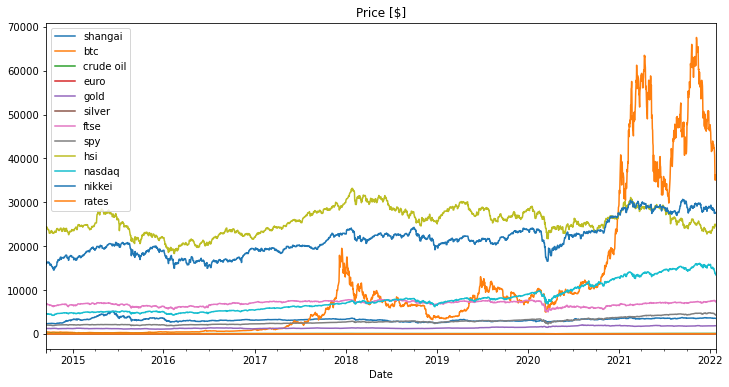

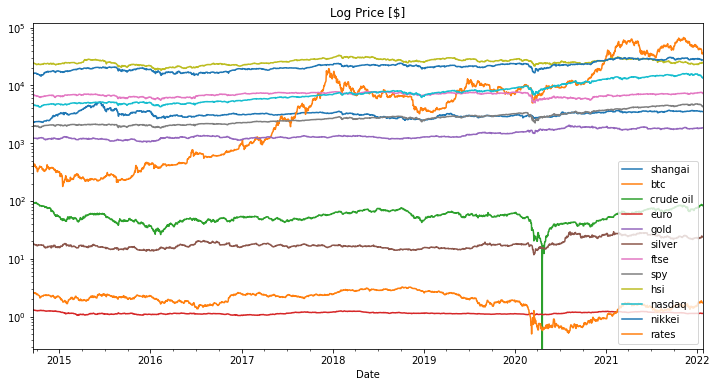

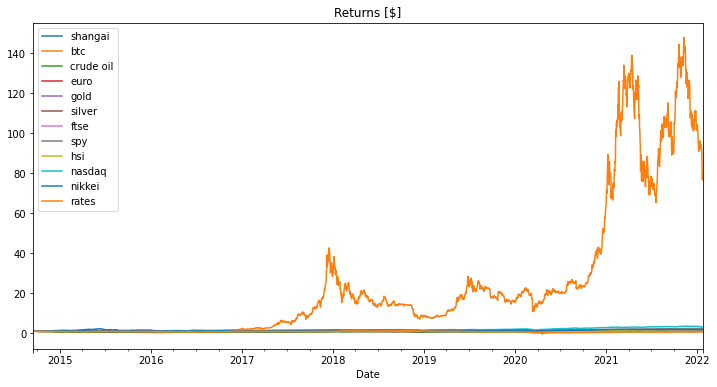

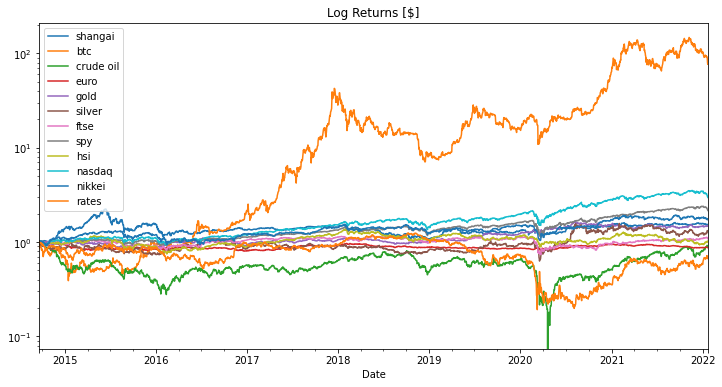

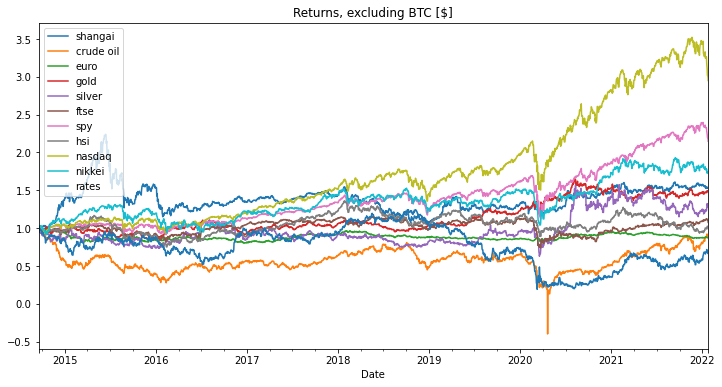

In [13]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()

# For the above, it makes sense to take the logarithm
log_cumulative = np.log(cumulative)

close.plot(figsize=(12,6),label='Price', title='Price [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log Price [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log Returns [$]')

cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Returns, excluding BTC [$]')

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>],
       [<AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>],
       [<AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>]], dtype=object)

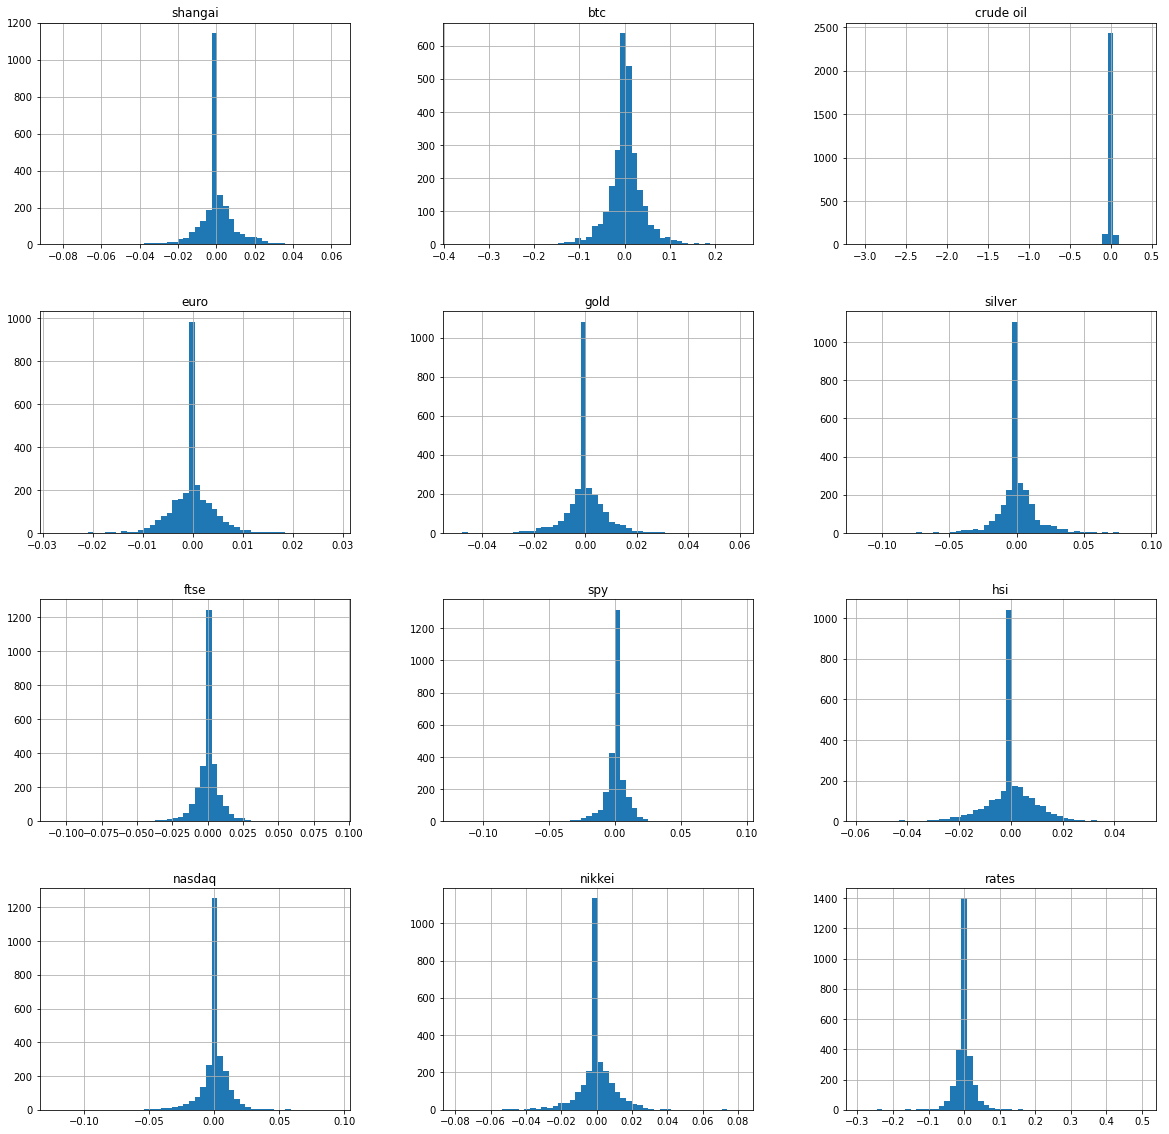

In [14]:
returns.hist(bins=50, figsize=(20,20))

As returns have a normal distribution, log normality will be possible with closing prices, but we will dive deeper
 into the dopic further ahead.

## Technical Indicator functions
Now we will calculate several indicators typically used in technical analysis of stock prices,
such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a.
the expanding standard deviation of Bitcoin price.

In [15]:
ta = tickers.btc

from data_utils.technical_analysis import transform_std, transform_ma, transform_rsi

### TODO for future improvement:
### Use vectorized functions for more speed.
ta = transform_std(transform_rsi(transform_ma(ta, ma_values[0], ma_values[1], ma_values[2])))
ta.tail()

/var/folders/rg/kc1kl6ld7_x682wfwghvtgw80000gn/T/ipykernel_52514/4199865769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'+str(ma1)] = round(data['close'].rolling(ma1).mean(),0)
/var/folders/rg/kc1kl6ld7_x682wfwghvtgw80000gn/T/ipykernel_52514/4199865769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'+str(ma2)] = round(data['close'].rolling(ma2).mean(),0)
/var/folders/rg/kc1kl6ld7_x682wfwghvtgw80000gn/T/ipykernel_52514/4199865769.py:4: SettingWithCopyWarning: 
A value is trying t

,open,high,low,close,adj close,volume,MA4,MA50,MA80,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-20,41744.027344,43413.023438,40672.824219,40680.417969,40680.417969,2.038203e+10,41763.0,46736.0,51896.0,-0.025486,88.951219,0.000000,0.025486,0.004003,0.011517,0.347555,25.791543,18.789626,48.980272,23.192338,45.19,57.36,57.22,67.88,0.038851,0.002437,40680.379118
2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,4.301199e+10,40314.0,46335.0,51561.0,-0.103812,79.717045,0.000000,0.103812,0.003469,0.023823,0.145619,12.710979,12.710979,48.980272,0.000000,23.44,41.95,45.19,57.36,0.038897,0.002397,36457.277509
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,3.971439e+10,38478.0,45964.0,51212.0,-0.039143,76.596642,0.000000,0.039143,0.003007,0.025866,0.116237,10.413259,10.413259,48.980272,0.000000,7.73,25.45,23.44,41.95,0.038898,0.002382,35030.211102
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,2.601798e+10,37111.0,45706.0,50897.0,0.035585,79.322341,0.035585,0.000000,0.007350,0.022417,0.327893,24.692713,10.413259,48.980272,37.025046,12.34,14.50,7.73,25.45,0.038896,0.002394,36276.765791
2022-01-24,36163.117188,36319.960938,33227.503906,35846.132812,35846.132812,3.977888e+10,35903.0,45435.0,50581.0,-0.011872,78.380640,0.000000,0.011872,0.006370,0.021011,0.303190,23.265225,10.413259,48.980272,33.323728,23.45,14.51,12.34,14.50,0.038890,0.002389,35846.093922


In [16]:
# selection of technical indicators to feed the model
ta = ta[['open', 'high', 'low', 'close',
           f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}',
           'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

### Exploring volume data

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>],
       [<AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>],
       [<AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>]], dtype=object)

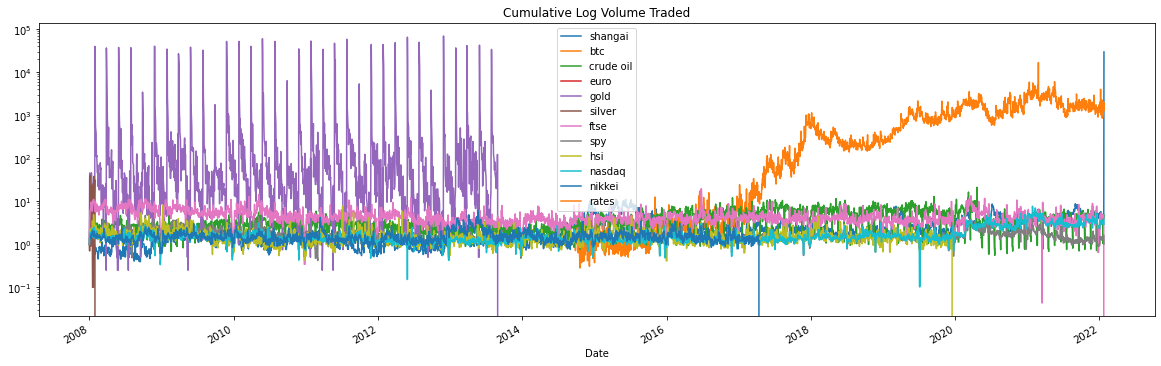

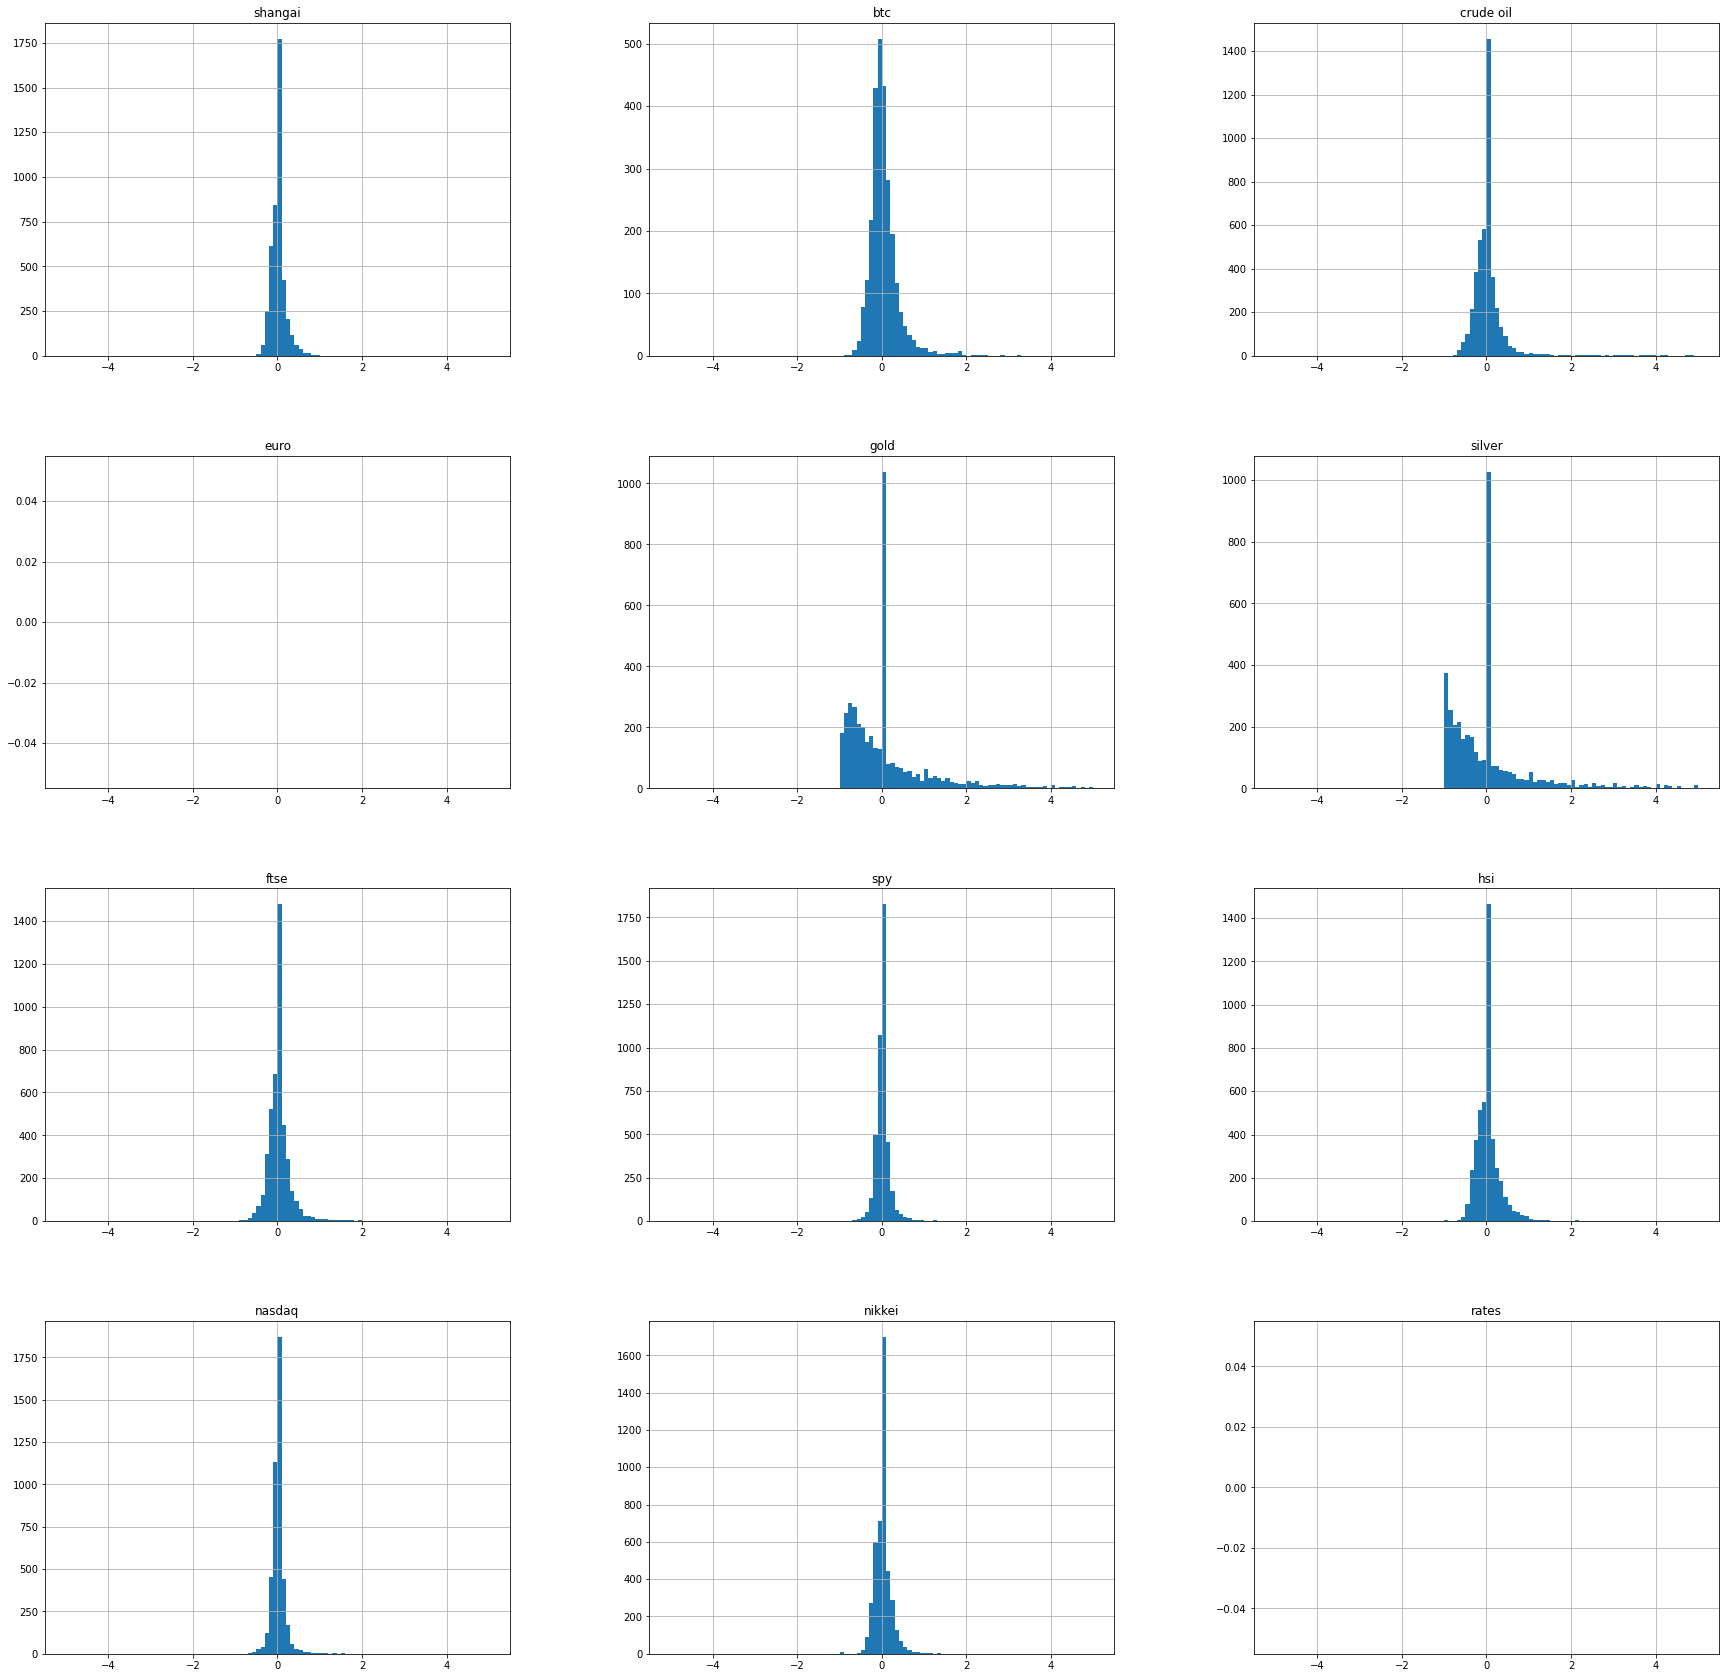

In [17]:
# volume.plot(logy=True, figsize=(20,6))
v_returns = volume.pct_change(1)
v_cumulative = (1+v_returns).cumprod()
v_cumulative.plot(logy=True, figsize=(20,6), title="Cumulative Log Volume Traded")
v_returns.hist(bins=100, figsize=(30,30), range=[-5, 5])

Ok volume data seems really interesting. However, gold and silver are skewed.
We also lack complete data of M2 money supply 'volume(?)' from 2014 onwards.

For the purpose of this capstone project, we will avoid including rates and the EUR/USD pair.

In [ ]:
volume.drop(columns=['rates', 'euro'], inplace=True)
volume.columns

In [19]:
volume.rename(columns = lambda x: "vol_" + x, inplace=True)
# volume.tail()

,vol_shangai,vol_btc,vol_crude oil,vol_gold,vol_silver,vol_ftse,vol_spy,vol_hsi,vol_nasdaq,vol_nikkei
Date,,,,,,,,,,
2022-01-20,3.795000e+05,2.038203e+10,532202.0,20.0,21.0,786613700.0,3.473060e+09,2.531395e+09,5.078450e+09,74000000.0
2022-01-21,3.265000e+05,4.301199e+10,532202.0,20.0,21.0,819199800.0,3.945810e+09,2.370147e+09,5.845830e+09,72700000.0
2022-01-22,3.265000e+05,3.971439e+10,532202.0,20.0,21.0,819199800.0,3.945810e+09,2.370147e+09,5.845830e+09,72700000.0
2022-01-23,3.265000e+05,2.601798e+10,532202.0,20.0,21.0,819199800.0,3.945810e+09,2.370147e+09,5.845830e+09,72700000.0
2022-01-24,2.257030e+09,3.977888e+10,447293.0,226253.0,66846.0,0.0,2.479357e+09,0.000000e+00,4.237371e+09,0.0


In [20]:
volume.describe()

,vol_shangai,vol_btc,vol_crude oil,vol_gold,vol_silver,vol_ftse,vol_spy,vol_hsi,vol_nasdaq,vol_nikkei
count,4.437000e+03,2.687000e+03,4.439000e+03,4439.000000,4439.000000,4.439000e+03,4.439000e+03,4.437000e+03,4.439000e+03,4.435000e+03
mean,7.010566e+05,1.462545e+10,4.144690e+05,5729.478711,1804.098220,8.564941e+08,3.991641e+09,1.893235e+09,2.433480e+09,1.218158e+08
std,3.388120e+07,2.008960e+10,2.126527e+05,30350.523391,9914.888243,3.384125e+08,1.176795e+09,7.456028e+08,1.159008e+09,5.420285e+07
min,3.040000e+04,5.914570e+06,4.851600e+04,0.000000,0.000000,0.000000e+00,1.025000e+09,0.000000e+00,1.494100e+08,0.000000e+00
25%,1.022000e+05,7.850345e+07,2.592010e+05,41.000000,8.000000,6.573378e+08,3.272355e+09,1.421452e+09,1.790505e+09,7.880000e+07
50%,1.548000e+05,5.004347e+09,3.605750e+05,141.000000,42.000000,7.866144e+08,3.709050e+09,1.736227e+09,2.032500e+09,1.181000e+08
75%,2.470000e+05,2.449504e+10,5.471900e+05,474.000000,154.000000,9.733525e+08,4.440980e+09,2.172138e+09,2.475160e+09,1.499500e+08
max,2.257030e+09,3.509679e+11,2.288230e+06,386334.000000,170297.000000,3.761301e+09,1.145623e+10,9.799120e+09,1.110216e+10,5.952000e+08


The problem with using volume data, seems that it is that not all instruments have it available,
plus we are not sure whether this is on the same measure value (USD). For this we will only take BTC.

### Fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty,
(daily) number of transactions and cost per transaction.

In [21]:
import quandl
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
quandl_key = os.getenv("QUANDLKEY")
quandl.ApiConfig.api_key = quandl_key # (insert if available, else there is a ratelimit)

In [22]:
# print('This is your key!', quandl_key)

In [23]:

# btc mining is an interesting source, but free data has not the same quality ;)

# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction


# m2 = quandl.get("FED/M2_N_WM") # unfortunately M2 money supply free data does not meet quality standards
# m2.rename({"Value":"M2"})

# fundamentals.fillna(method='ffill')

### Joining the data into a single DataFrame

In [25]:
df = pd.concat([close, ta], axis=1)
df = pd.concat([df, volume['vol_btc']], axis=1)

fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1)
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost'] #, 'm2']
fundamentals.plot(figsize=(20,10), logy=True)
df = pd.concat([df, fundamentals], axis=1)
# df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df.tail()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,open,high,low,close,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_btc,hashrate,difficulty,transactions,t_cost
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-20,3555.060059,40680.417969,86.900002,1.134340,1842.500000,24.711000,7585.000000,4482.729980,24952.349609,14154.019531,27772.929688,1.833,41744.027344,43413.023438,40672.824219,40680.417969,41763.0,46736.0,51896.0,23.192338,25.791543,0.038851,40680.379118,2.038203e+10,2.047490e+08,2.437187e+13,704099618.0,170.263707
2022-01-21,3522.570068,36457.316406,85.139999,1.131375,1831.800049,24.313999,7494.100098,4397.939941,24965.550781,13768.919922,27522.259766,1.747,40699.605469,41060.527344,35791.425781,36457.316406,40314.0,46335.0,51561.0,0.000000,12.710979,0.038897,36457.277509,4.301199e+10,1.754426e+08,2.633808e+13,704372101.0,121.091282
2022-01-22,3522.570068,35030.250000,85.139999,1.131375,1831.800049,24.313999,7494.100098,4397.939941,24965.550781,13768.919922,27522.259766,1.747,36471.589844,36688.812500,34349.250000,35030.250000,38478.0,45964.0,51212.0,0.000000,10.413259,0.038898,35030.211102,3.971439e+10,1.774749e+08,2.664319e+13,704643270.0,120.300332
2022-01-23,3522.570068,36276.804688,85.139999,1.131375,1831.800049,24.313999,7494.100098,4397.939941,24965.550781,13768.919922,27522.259766,1.747,35047.359375,36433.312500,34784.968750,36276.804688,37111.0,45706.0,50897.0,37.025046,24.692713,0.038896,36276.765791,2.601798e+10,1.867460e+08,2.664319e+13,704893827.0,154.349201
2022-01-24,3524.104980,35846.132812,83.209999,1.132759,1841.400024,23.885000,7297.149902,4299.810059,24656.460938,13463.205078,27588.369141,1.730,36163.117188,36319.960938,33227.503906,35846.132812,35903.0,45435.0,50581.0,33.323728,23.265225,0.038890,35846.093922,3.977888e+10,NaN,NaN,NaN,NaN


## Labelling buy, sell and no-trade signals
Following our objective, we will need to predict whether prices are going to go up or down.
For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy,
 down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [26]:
returns.btc.describe()

count    2686.000000
mean        0.002389
std         0.038890
min        -0.371695
25%        -0.013150
50%         0.001962
75%         0.018267
max         0.252472
Name: btc, dtype: float64

Given the confidence intervals above, I will take the top 75% interval as buy label (1),
the lowest 25% for the sell label (2), and the values in between as no-trade (0).
The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   2.,   0.,   2.,   1.,   4.,   2.,   1.,   7.,   7.,  13.,
          5.,   9.,   9.,  15.,  18.,  39.,  30.,  33.,  44.,  55.,  78.,
         98., 123., 163., 280., 358., 302., 236., 148., 127.,  91.,  74.,
         67.,  50.,  35.,  24.,  24.,  22.,  13.,   8.,   7.,  16.,   8.,
          7.,   6.,   3.,   3.,   1.,   0.,   2.,   3.,   0.,   0.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.37169539, -0.36545371, -0.35921204, -0.35297037, -0.3467287 ,
        -0.34048703, -0.33424536, -0.32800369, -0.32176202, -0.31552035,
        -0.30927868, -0.30303701, -0.29679534, -0.29055367, -0.28431199,
        -0.27807032, -0.27182865, -0.26558698, -0.25934531, -0.25310364,
        -0.24686197, -0.24

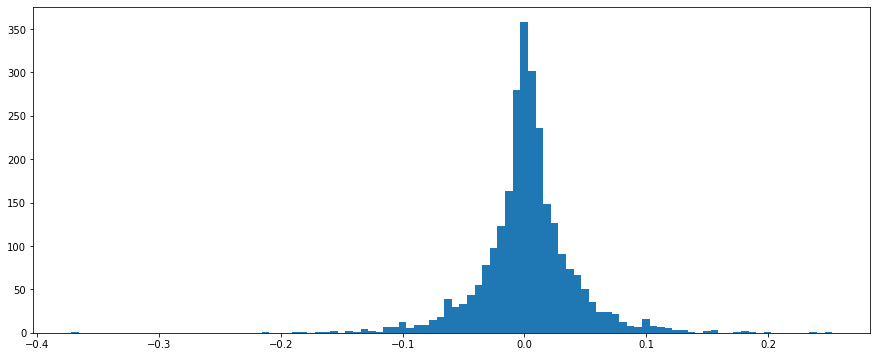

In [27]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=100)

In [28]:
print(log_cumulative.columns)
# log_cumulative.tail()

Index(['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'ftse', 'spy',
       'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')


,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates
Date,,,,,,,,,,,,
2022-01-20,0.432037,4.488088,-0.082995,-0.133160,0.400538,0.280706,0.112063,0.806300,0.023352,1.132196,0.558456,-0.349557
2022-01-21,0.422856,4.378483,-0.103456,-0.135777,0.394714,0.264509,0.100006,0.787204,0.023881,1.104611,0.549389,-0.397611
2022-01-22,0.422856,4.338553,-0.103456,-0.135777,0.394714,0.264509,0.100006,0.787204,0.023881,1.104611,0.549389,-0.397611
2022-01-23,0.422856,4.373520,-0.103456,-0.135777,0.394714,0.264509,0.100006,0.787204,0.023881,1.104611,0.549389,-0.397611
2022-01-24,0.423291,4.361577,-0.126385,-0.134555,0.399941,0.246708,0.073374,0.764639,0.011423,1.082158,0.551788,-0.407390


### Creating labels

In [29]:
labels = pd.DataFrame(returns.btc)
labels['y_returns'] = returns.btc
labels.drop(columns=['btc'], inplace=True)
labels['y_close'] = ta.close

In [30]:
print(labels.columns)
labels.tail()

Index(['y_returns', 'y_close'], dtype='object')


,y_returns,y_close
Date,,
2022-01-20,-0.025486,40680.417969
2022-01-21,-0.103812,36457.316406
2022-01-22,-0.039143,35030.250000
2022-01-23,0.035585,36276.804688
2022-01-24,-0.011872,35846.132812


In [31]:
buy_cond = labels.y_returns > labels.y_returns.describe().loc['75%'] # returns.btc.describe()['75%']
sell_cond = labels.y_returns <  labels.y_returns.describe().loc['25%'] # -0.013636 # returns.btc.describe()['25%']

In [32]:
labels['y_c'] = 0
labels['y_c'] = labels['y_c'].mask(buy_cond, 1)
labels['y_c'] = labels['y_c'].mask(sell_cond, -1)
labels.head()

# Finally join our labels with the consolidated DataFrame
df = pd.concat([df,labels], axis=1)

### Data cleaning
I'll consider the minimal available records as starting point and select the training data.
Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [33]:
# row data cleaning
print('df ', df.shape)
print(df.index.min())

print('labels ', labels.shape)
print(labels.index.min())

df  (5035, 31)
2007-12-31 00:00:00
labels  (2687, 3)
2014-09-17 00:00:00


In [34]:
# Take the least available value
df = df[df.index.min():].dropna()
df.describe()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,open,high,low,close,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_btc,hashrate,difficulty,transactions,t_cost,y_returns,y_close,y_c
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2685.000000,2685.000000,2685.000000,2685.000000
mean,3187.690701,11034.884118,54.323441,1.143526,1408.789385,18.175236,6898.481301,2804.871650,25718.855859,7935.287233,21544.972848,1.964915,11023.338063,11321.083095,10693.532952,11034.884118,11015.068156,10638.737430,10355.343762,52.193608,55.110052,0.037482,11034.835595,1.462152e+10,5.273245e+07,7.283171e+12,3.351650e+08,53.270386,0.002394,11034.884118,0.000000
std,399.838748,15921.832165,13.074322,0.049698,255.658098,3.795430,543.645922,752.120198,2905.145339,3237.764617,3784.984676,0.643959,15920.080819,16350.156119,15421.707670,15921.832165,15901.622771,15463.495976,15054.570305,35.094209,17.887156,0.003172,15921.838636,2.008924e+10,5.764588e+07,7.965764e+12,2.039572e+08,57.730045,0.038896,15921.832165,0.707633
min,2289.865967,178.102997,-37.630001,1.039047,1050.800049,11.735000,4993.899902,1829.079956,18319.580078,4213.660156,14532.509766,0.499000,176.897003,211.731003,171.509995,178.102997,199.000000,232.000000,234.000000,0.000000,0.000000,0.001473,178.061070,5.914570e+06,2.205477e+05,2.982973e+10,4.694520e+07,3.442916,-0.371695,178.102997,-1.000000
25%,2928.229980,604.728027,45.930000,1.108955,1222.199951,15.681000,6527.899902,2127.830078,23649.310547,5142.270020,19057.500000,1.573000,602.960999,607.116028,596.848022,604.728027,604.000000,594.000000,581.000000,20.642970,42.381603,0.035384,604.695350,7.852910e+07,1.535533e+06,2.133989e+11,1.437081e+08,9.268671,-0.013153,604.728027,-1.000000
50%,3158.793945,6249.180176,53.180000,1.133414,1293.300049,16.898001,7022.500000,2683.340088,25727.410156,7200.870117,21144.480469,2.054000,6245.624512,6378.135254,6109.029785,6249.180176,6284.000000,6125.000000,5793.000000,52.316651,54.233317,0.038682,6249.140292,5.004347e+09,3.199002e+07,4.143878e+12,3.178957e+08,33.408119,0.001964,6249.180176,0.000000
75%,3404.659912,10334.974609,62.759998,1.179523,1642.099976,18.545000,7331.899902,3120.459961,27992.830078,9022.389648,23112.880859,2.390000,10328.734375,10524.349609,10087.300781,10334.974609,10316.000000,10215.000000,10036.000000,85.556333,68.292870,0.039161,10334.935569,2.448723e+10,1.045998e+08,1.471521e+13,5.146156e+08,65.281982,0.018269,10334.974609,1.000000
max,5166.350098,67566.828125,94.570000,1.292006,2051.500000,29.398001,7877.500000,4796.560059,33154.121094,16057.440430,30670.099609,3.234000,67549.734375,68789.625000,66382.062500,67566.828125,66121.000000,60802.000000,56971.000000,100.000000,98.422025,0.061565,67566.789052,3.509679e+11,2.168643e+08,2.664319e+13,7.048938e+08,300.310549,0.252472,67566.828125,1.000000


In [ ]:
df = df[df.btc.]

In [35]:
df.head()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,open,high,low,close,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_btc,hashrate,difficulty,transactions,t_cost,y_returns,y_close,y_c
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-18,2315.927979,424.440002,93.070000,1.285000,1225.699951,18.452000,6819.299805,2011.359985,24168.720703,4593.430176,16067.570312,2.629,456.859985,456.859985,413.104004,424.440002,421.0,373.0,373.0,63.913817,0.000000,0.001473,394.794517,34483200.0,240220.740405,2.982973e+10,46945196.0,29.138967,-0.071926,424.440002,-1.0
2014-09-19,2329.450928,394.795990,92.410004,1.292006,1215.300049,17.781000,6837.899902,2010.400024,24306.160156,4579.790039,16321.169922,2.587,424.102997,427.834991,384.532013,394.795990,421.0,373.0,373.0,63.913817,0.000000,0.001473,394.794517,37919700.0,240220.740405,2.982973e+10,47136557.0,28.902143,-0.069843,394.795990,-1.0
2014-09-20,2329.450928,408.903992,92.410004,1.292006,1215.300049,17.781000,6837.899902,2010.400024,24306.160156,4579.790039,16321.169922,2.587,394.673004,423.295990,389.882996,408.903992,421.0,373.0,373.0,63.913817,23.777418,0.061565,408.842426,36863600.0,259497.713401,2.982973e+10,47199708.0,28.205716,0.035735,408.903992,1.0
2014-09-21,2329.450928,398.821014,92.410004,1.292006,1215.300049,17.781000,6837.899902,2010.400024,24306.160156,4579.790039,16321.169922,2.587,408.084991,412.425995,393.181000,398.821014,407.0,373.0,373.0,63.913817,19.992515,0.050551,398.770463,26580100.0,232806.520022,2.982973e+10,47156242.0,29.910568,-0.024659,398.821014,-1.0
2014-09-22,2289.865967,402.152008,91.519997,1.284142,1216.800049,17.698999,6773.600098,1994.290039,23955.490234,4527.689941,16205.900391,2.566,399.100006,406.915985,397.130005,402.152008,401.0,373.0,373.0,63.913817,24.678341,0.047468,402.104541,24127600.0,232806.520022,2.982973e+10,47339374.0,22.511639,0.008352,402.152008,0.0


In [36]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

In [37]:
labels['y_returns_shift'] = labels['y_returns'].shift(-1)
df['y_c_shift'] = df['y_c'].shift(-1)
df['y_close_shift'] = df['y_close'].shift(-1)

df = df[:-2]
df.tail()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,open,high,low,close,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_btc,hashrate,difficulty,transactions,t_cost,y_returns,y_close,y_c,y_c_shift,y_close_shift
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-17,3541.669922,42250.550781,83.820000,1.141070,1816.500000,22.910999,7611.200195,4662.850098,24218.029297,14893.750000,28333.519531,1.772,43118.121094,43179.390625,41680.320312,42250.550781,42910.0,47681.0,52638.0,59.268123,36.683055,0.038867,42250.511914,2.169090e+10,1.950567e+08,2.437187e+13,703305976.0,169.533736,-0.020024,42250.550781,-1.0,0.0,42375.632812
2022-01-18,3569.909912,42375.632812,85.430000,1.141057,1812.300049,23.487000,7563.600098,4577.109863,24112.779297,14506.900391,28257.250000,1.865,42250.074219,42534.402344,41392.214844,42375.632812,42729.0,47372.0,52394.0,65.246963,38.488105,0.038860,42375.593953,2.241721e+10,1.647684e+08,2.437187e+13,703565724.0,136.294827,0.002960,42375.632812,0.0,-1.0,41744.328125
2022-01-19,3558.179932,41744.328125,86.959999,1.132965,1843.099976,24.226000,7589.700195,4532.759766,24127.849609,14340.259766,27467.230469,1.827,42374.039062,42478.304688,41242.914062,41744.328125,42371.0,47067.0,52150.0,47.141563,33.021968,0.038854,41744.289271,2.309154e+10,2.095951e+08,2.437187e+13,703830844.0,169.617364,-0.014898,41744.328125,-1.0,-1.0,40680.417969
2022-01-20,3555.060059,40680.417969,86.900002,1.134340,1842.500000,24.711000,7585.000000,4482.729980,24952.349609,14154.019531,27772.929688,1.833,41744.027344,43413.023438,40672.824219,40680.417969,41763.0,46736.0,51896.0,23.192338,25.791543,0.038851,40680.379118,2.038203e+10,2.047490e+08,2.437187e+13,704099618.0,170.263707,-0.025486,40680.417969,-1.0,-1.0,36457.316406
2022-01-21,3522.570068,36457.316406,85.139999,1.131375,1831.800049,24.313999,7494.100098,4397.939941,24965.550781,13768.919922,27522.259766,1.747,40699.605469,41060.527344,35791.425781,36457.316406,40314.0,46335.0,51561.0,0.000000,12.710979,0.038897,36457.277509,4.301199e+10,1.754426e+08,2.633808e+13,704372101.0,121.091282,-0.103812,36457.316406,-1.0,-1.0,35030.250000


## Data transformations

In order to make try our best so that no feature becomes more important in the dataset than the others,
we will create functions to normalize these and bring them back to the dataset's original state.
This will be used later before saving the feed-in dataset.

We will be using log cumulative returns for price features, and normalize the oscillating factors (i.e. RSI)

<AxesSubplot:title={'center':'Cumulative Returns [$]'}, xlabel='Date'>

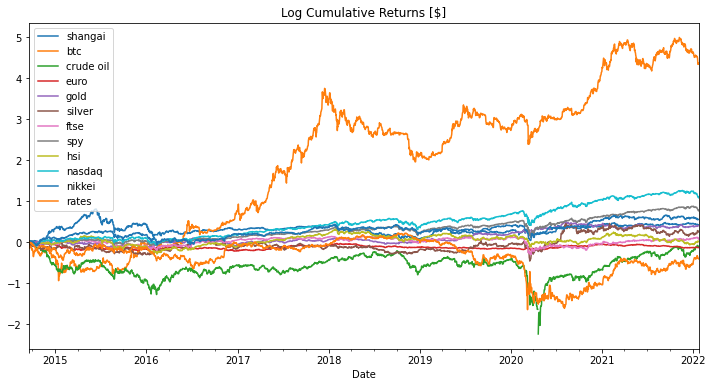

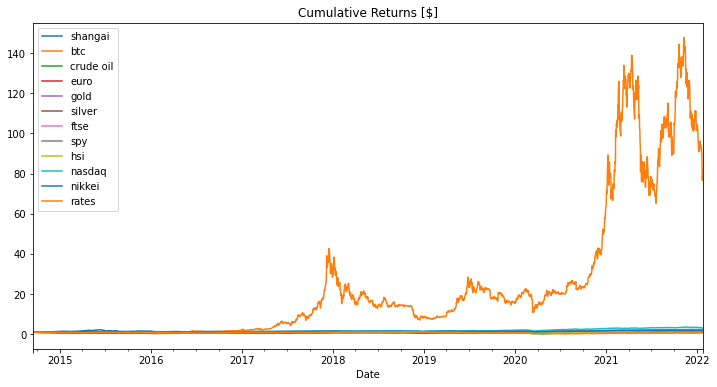

In [38]:
# For the above, it makes sense to take the logarithm
log_cumulative = np.log(cumulative)
# We can observe that log cumulative returns are reversible. This is useful for predicting price.
log_cumulative.loc[:,:].plot(
    figsize=(12,6), title='Log Cumulative Returns [$]')

np.exp(log_cumulative).plot(figsize=(12,6), title='Cumulative Returns [$]')

Here we will apply the mentioned transformation to features, in a sense que can
revert these to previous values. We will use normalization on log_cumulative (easing a lognormal step),
and normalize and standardize oscillators.

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>,
        <AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>,
        <AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'MA4'}>,
        <AxesSubplot:title={'center':'MA50'}>],
       [<AxesSubplot:title={'center':'MA80'}>,
        <AxesSubplot:title={'center':'stochRSI'}>,
        <AxesSubplot:title={'center':'RSI'

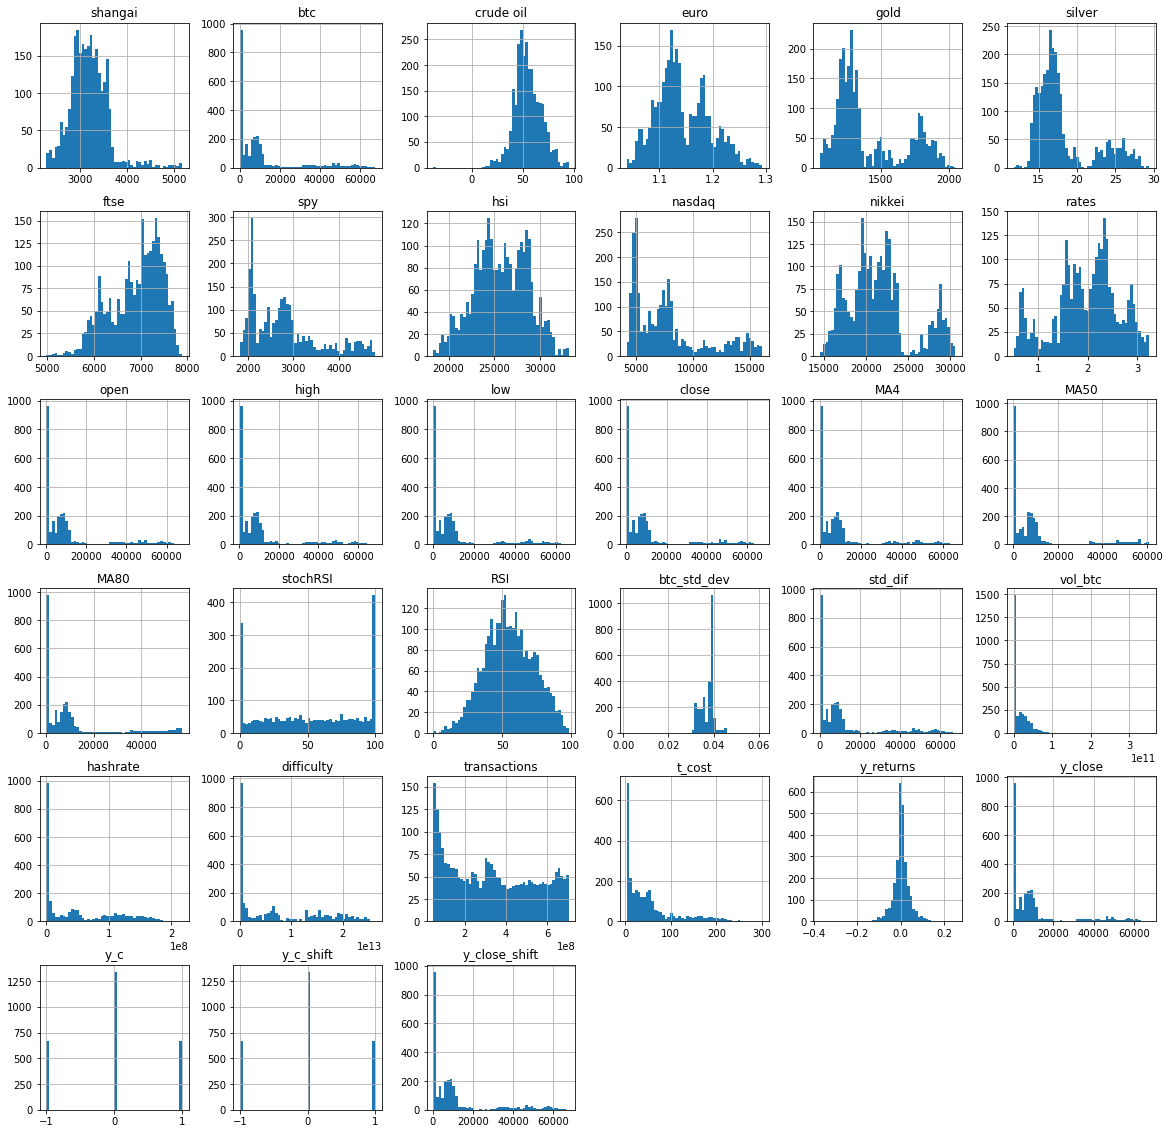

In [39]:
# Have a look at the data
df.hist(bins=50, figsize=(20,20))

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>,
        <AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>,
        <AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'MA4'}>,
        <AxesSubplot:title={'center':'MA50'}>],
       [<AxesSubplot:title={'center':'MA80'}>,
        <AxesSubplot:title={'center':'stochRSI'}>,
        <AxesSubplot:title={'center':'RSI'

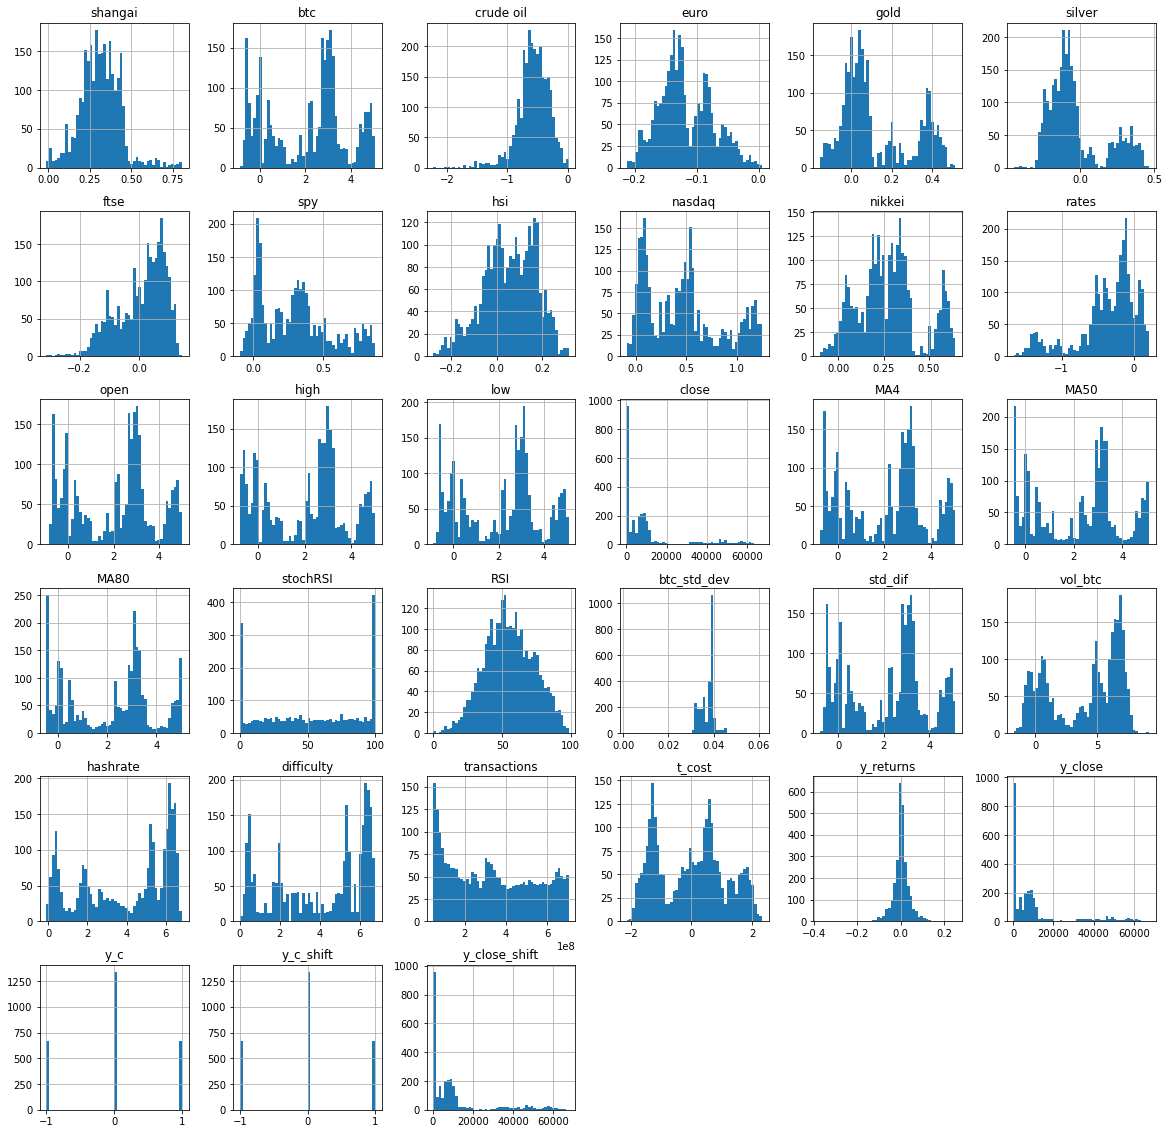

In [40]:
# Take log cumulative returns of skewed features
cum_cols = list(close.columns) + ['open', 'high','low',
            'std_dif', f'MA{ma_values[0]}', f'MA{ma_values[1]}', f'MA{ma_values[2]}',
            'hashrate', 'difficulty', 't_cost', 'vol_btc']

# We will do transformations on a copy of the dataframe to preserve original data
ndf = df
ndf[cum_cols] = (1 + ndf[cum_cols].pct_change(1)).cumprod()
ndf[cum_cols] = np.log(ndf[cum_cols])

ndf.hist(bins=50, figsize=(20,20))

In [41]:
# Drop columns that are not needed anymore
drop_cols = ['close']

for x in drop_cols:
    if x in ndf.columns:
        ndf.drop(columns=x, inplace=True)

In [42]:
# Normalize what is needed
# norm_cols = ['']
# ndf[norm_cols], mindf, maxdf = min_max_scaler(ndf[norm_cols], log=False)

['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'ftse', 'spy', 'hsi', 'nasdaq', 'nikkei', 'rates', 'open', 'high', 'low', 'MA4', 'MA50', 'MA80', 'stochRSI', 'RSI', 'btc_std_dev', 'std_dif', 'vol_btc', 'hashrate', 'difficulty', 'transactions', 't_cost', 'y_c']


array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>,
        <AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>,
        <AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'MA4'}>,
        <AxesSubplot:title={'center':'MA50'}>,
        <AxesSubplot:title={'center':'MA80'}>],
       [<AxesSubplot:title={'center':'stochRSI'}>,
        <AxesSubplot:title={'center':'RSI'}>,
        <AxesSubplot:title={'center':'btc_st

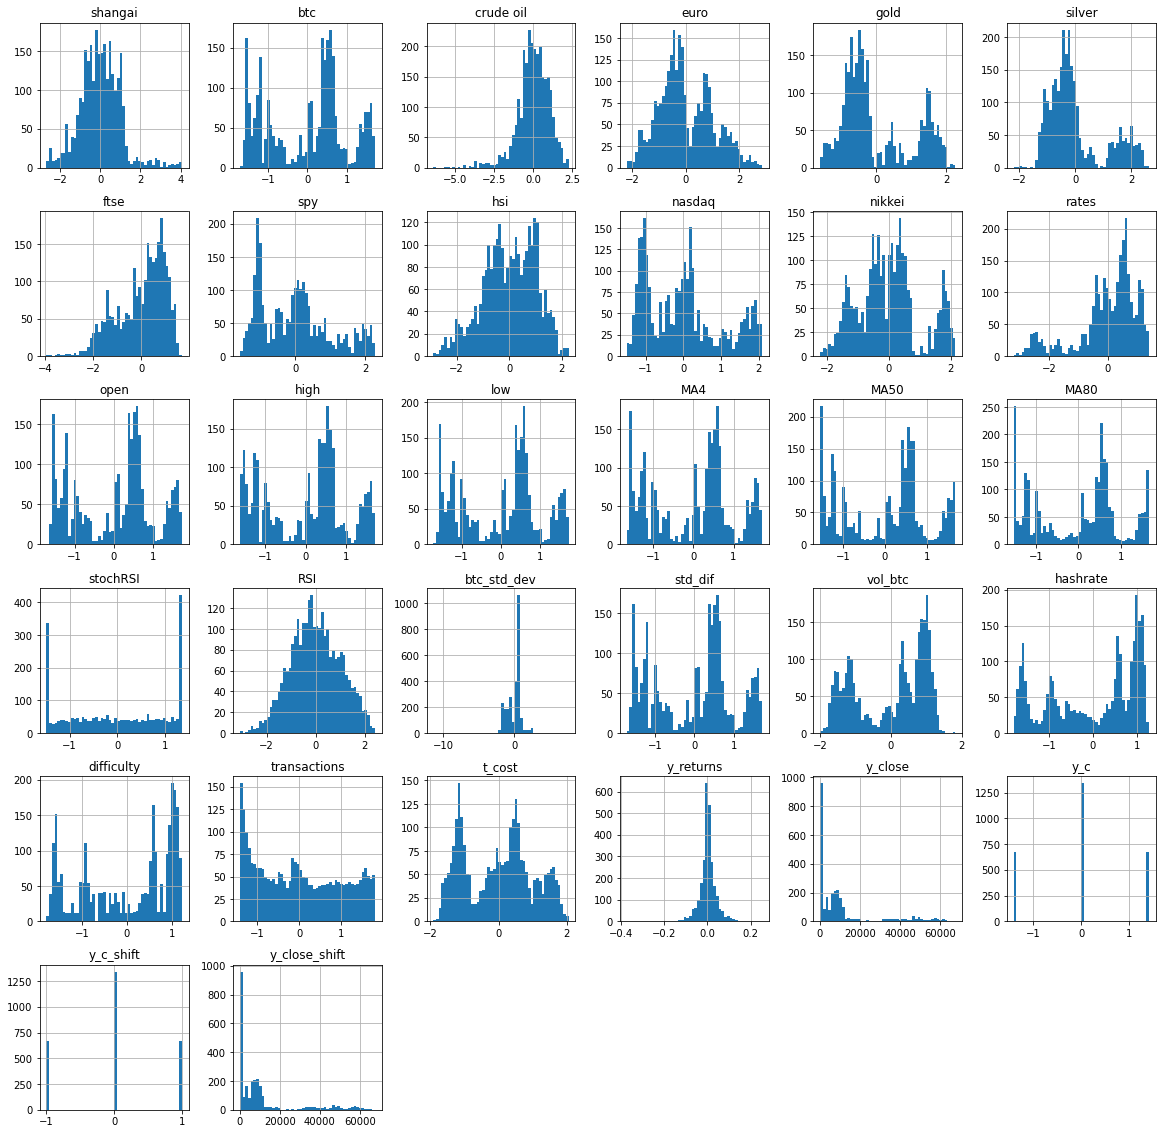

In [43]:
# Standardize what needs to be. In this case, the whole dataset, except labels
s_cols = list(ndf.columns)
non_s_cols = ['y_close', 'y_returns', 'y_c_shift', 'y_close_shift', 'y_returns_shift']

for x in non_s_cols:
    s_cols.remove(x)

print(s_cols)
ndf[s_cols], mean, std = standardizer(ndf[s_cols], log=False)

ndf.hist(bins=50, figsize=(20,20))

In [44]:
ndf.tail()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,open,high,low,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_btc,hashrate,difficulty,transactions,t_cost,y_returns,y_close,y_c,y_c_shift,y_close_shift
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-17,0.932505,1.446208,1.792727,-0.027354,1.565680,1.318892,1.250852,2.166617,-0.466207,1.884736,1.692263,-0.081772,1.458954,1.443523,1.457729,1.456698,1.542970,1.618831,0.200886,-1.033122,0.436805,1.446191,0.852740,1.224617,1.181012,1.807884,1.545363,-0.020024,42250.550781,-1.413687,0.0,42375.632812
2022-01-18,0.998205,1.447915,1.866099,-0.027618,1.552242,1.449333,1.173623,2.092309,-0.504060,1.814231,1.676469,0.044237,1.447208,1.434848,1.453710,1.454256,1.539201,1.616128,0.371264,-0.932074,0.434518,1.447898,0.864174,1.149479,1.181012,1.809159,1.351902,0.002960,42375.632812,0.000000,-1.0,41744.328125
2022-01-19,0.970979,1.439246,1.934555,-0.192781,1.650071,1.612080,1.216029,2.053324,-0.498629,1.783278,1.510315,-0.006474,1.448900,1.434088,1.451617,1.449396,1.535457,1.613413,-0.144683,-1.238072,0.432689,1.439230,0.874462,1.256625,1.181012,1.810460,1.545800,-0.014898,41744.328125,-1.413687,-1.0,40680.417969
2022-01-20,0.963722,1.424337,1.931894,-0.164632,1.648181,1.716214,1.208403,2.008886,-0.206601,1.748257,1.575169,0.001602,1.440249,1.446633,1.443553,1.441047,1.531366,1.610573,-0.827160,-1.642836,0.431585,1.424321,0.831134,1.246209,1.181012,1.811779,1.549172,-0.025486,40680.417969,-1.413687,-1.0,36457.316406
2022-01-21,0.887772,1.361040,1.852986,-0.225358,1.614371,1.631128,1.059984,1.932428,-0.202004,1.674355,1.522043,-0.116774,1.425615,1.414522,1.369481,1.420649,1.526370,1.606805,-1.488069,-2.375094,0.446361,1.361026,1.090391,1.177429,1.215396,1.813116,1.247051,-0.103812,36457.316406,-1.413687,-1.0,35030.250000


Our features look much better now! Did not do any transformations on the labels.

## Are these features correlated?

In [47]:
# Correlation of BTC with features
cor_list = df.corr()['btc'].sort_values(ascending=False).round(2)
cor_list.drop(
    # index=['btc', 'open', 'high', 'low',
    # 'std_dif', 'MA4', 'y_close_shift', 'MA50', 't_cost',
    # 'MA80', 'transactions', 'btc_std_dev',
    # 'RSI', 'y_returns', 'y_returns_shift', 'stochRSI', 'y_close',
    # 'y_returns', 'y_c_shift', 'difficulty', 'hashrate']
)

vol_btc      0.96
spy          0.94
nasdaq       0.94
nikkei       0.88
gold         0.80
silver       0.60
hsi          0.59
euro         0.39
crude oil    0.32
ftse         0.30
shangai      0.06
y_c         -0.01
rates       -0.33
Name: btc, dtype: float64

BTC is *only negatively correlated* to FED's interest rates, and very slightly to the target variable.

On the other hand, it is **strongly correlated** to its volume, other fundamentals seen above, as well as S&P and Nasdaq.

In [ ]:
# Normalized correlation does not change, uncomment below to see
# cor_list = ndf.corr()['btc'].sort_values(ascending=False).round(2)
# cor_list.drop(index=['btc', 'open', 'high', 'low',
#     'std_dif', 'MA4', 'y_close_shift', 'MA50', 't_cost',
#     'MA80', 'transactions', 'btc_std_dev',
#     'RSI', 'y_pnl', 'y_returns', 'y_returns_shift' 'stochRSI',
#     'returns_label', 'y_c_shift', 'difficulty', 'hashrate', 'log_btc_cumulative'])

<AxesSubplot:>

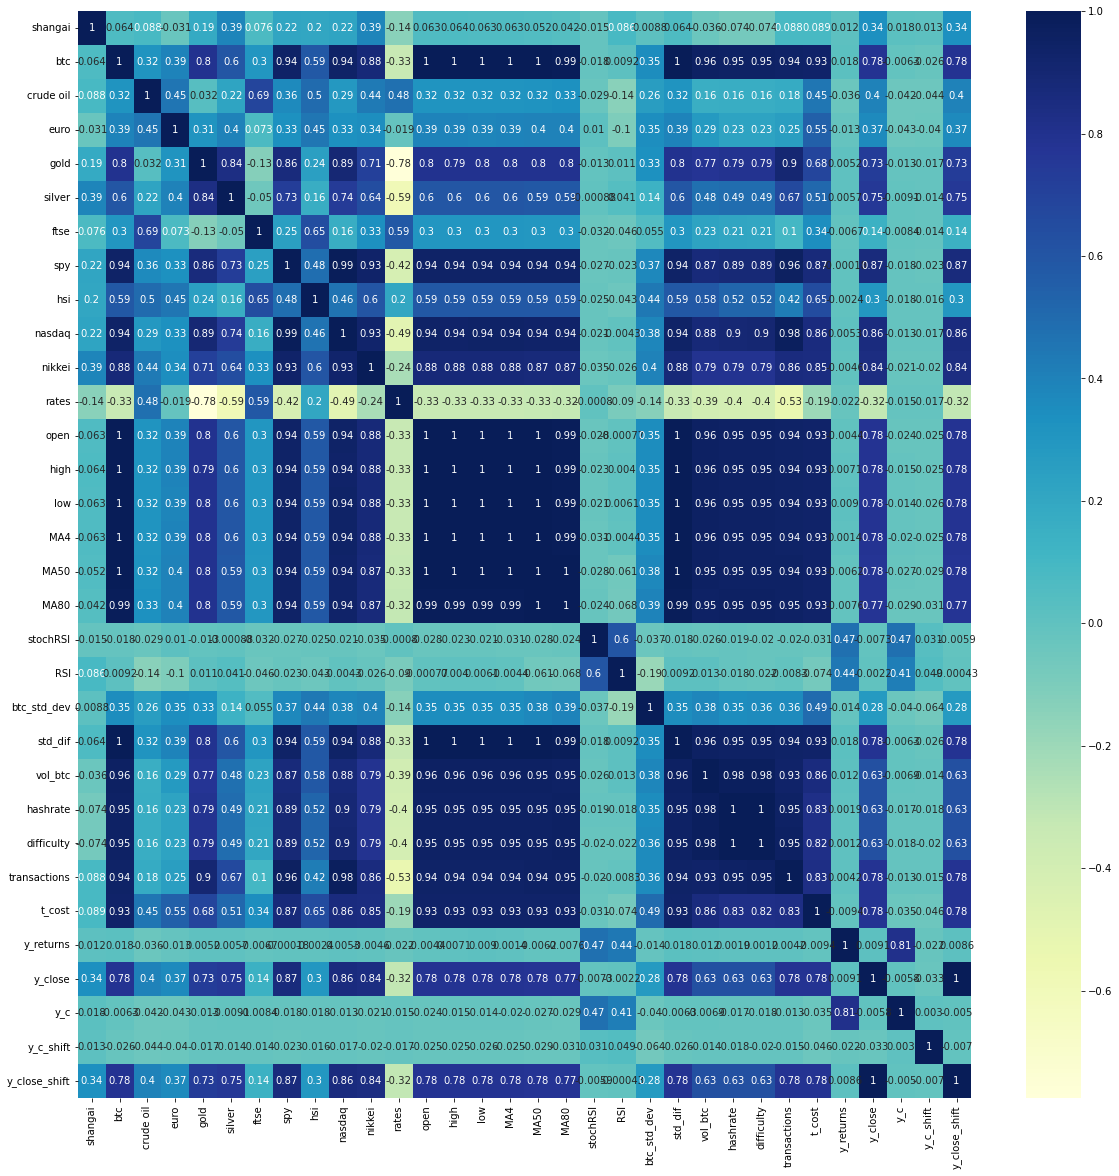

In [49]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [ ]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

### Saving the datasets

In [52]:
df_list = [df, ndf, mean, std]
df_path_list = ['data/df.csv', 'data/ndf.csv', 'data/mean.csv', 'data/std.csv']
for (x, y) in zip(df_list, df_path_list):
    x.to_csv(y)

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI),
stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the
historical distribution of daily Bitcoin returns.
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored data with and without transformations to compare how models perform.

# What comes next?

In the next notebook, you will find the following sections:

- **Applying AutoML on the data**
- **Training & tuning with Hyperdrive**
